In [1]:
import os
import pandas as pd
from collections import Counter

def count_occurence(_data):
    counter = Counter(_data)

    occurrences = [0] * 5
    for _index in range(1, 6):
        occurrences[_index - 1] = round(counter.get(_index, 0) / len(_data) * 100, 3)

    return occurrences

likert_out_path = '../../generated/figures/likert'

forms_data_csv_path = '../../generated/forms/data.csv'
likert_questions_csv_path = '../../data/forms/likert_questions.csv'

In [2]:
if not os.path.exists(forms_data_csv_path):
    raise FileNotFoundError(f"Le fichier {forms_data_csv_path} n'existe pas. Exécutez le notebook 'notebooks/arrange data/Database data.ipynb' pour le générer.")

df_data = pd.read_csv(forms_data_csv_path)
df_data

,Identifiant,group,Demographic Horodateur,D-Année d'étude,D-Genre,D-Outils gamifiés déjà utilisés ?,D-Compétences java,D-Compétences en écriture de test,D-Motivation initiale à écrire des tests,Achievements Horodateur,...,"S-Clarté des règles du jeu (achievements, leaderboard)",S-Design et intégration dans IntelliJ,"S-Selon vous, quel mode est le plus fun ?",S-Le système de points et de progression vous a-t-il semblé juste ?,"S-J'ai été tenté d'écrire plus de tests pour augmenter mes points, même si les tests ne sont pas spécialement pertinents","S-Seriez-vous intéressé·e par l'utilisation d'outils gamifiés durant certains cours ?\n(Vérification et Validation, Génie Logiciel, ..)","S-Quel mode j'ai envie d'utiliser dans un cours où je peux être confronté à du test logiciel ? \n(Vérification et Validation, Génie Logiciel, ..)",S-Donner 3 points positifs du plugin,S-Donner 3 points négatifs du plugin,S-Donner 3 améliorations à apporter au plugin
0,9,A,2025-04-17 08:47:23,Passerelle,Homme,"Duolingo, Kahoot!",4,4,4,2025-04-17 09:32:41,...,4,5,2,Oui,2,2,3,"Belle intégration, chouette concept, jolie UI",Le leaderboard ne s’est pas affiché pendant to...,"Bouton pour actualiser le leaderboard, amélior..."
1,23,A,2025-04-17 08:47:58,Passerelle,Homme,"Duolingo, Kahoot!",4,4,3,2025-04-17 09:32:42,...,3,3,5,Non,4,5,5,Donne un but (récompense) à la création de tes...,"Calcul des points à retravailler, j'ai reçu de...",Vérifier le calcul des points du leaderbord me...
2,36,B,2025-04-17 08:48:03,Passerelle,Homme,"Duolingo, Kahoot!",4,3,4,2025-04-17 10:07:39,...,4,4,4,Non,1,4,5,"Fun, stimulant, bien intégré",Buggé (achievements qui ne se valident pas inj...,Améliorer le système de connexion (une seule c...
3,8,B,2025-04-17 08:48:08,Passerelle,Homme,Duolingo,4,3,2,2025-04-17 10:07:55,...,5,4,1,Non,2,2,3,Clair\nFacile à prendre en main\nLudique,Trop d'achèvements\nJ'ai eu le sentiment de ne...,Moins d'achèvements (de 1 à 3 par catégories)\...
4,42,B,2025-04-17 08:48:15,BAC 3,Homme,"Duolingo, Kahoot!",2,2,1,2025-04-17 10:07:57,...,2,5,1,Non,5,5,1,Bien implémenté / amusant / sympa et cool,Score mal foutu / difficulté d’implémenter le ...,Le score car possibilité de dupliquer son scor...
5,47,A,2025-04-17 08:48:17,BAC 3,Homme,"Duolingo, Kahoot!, CodeCombat, GitHub Achievem...",4,2,2,2025-04-17 09:32:40,...,5,5,2,Non,2,5,5,"Pratique, pas compliqué a installé, motivant",Des gens trichants en réécrivant plusieurs foi...,"D’empêcher la triche, et rien de plus"
6,100,B,2025-04-17 08:48:18,BAC 3,Homme,Duolingo,2,1,3,2025-04-17 10:07:51,...,5,5,2,Oui,5,4,4,"Facile d'utilisation, Amusant, Motivant",On peut executer plusieurs fois le même test p...,"Pour chacun des types de tests évalués, Donner..."
7,92,B,2025-04-17 08:48:19,BAC 2,Femme,"Duolingo, Kahoot!",3,2,3,2025-04-17 10:07:11,...,2,5,5,Oui,2,5,5,"Visualisation de la progression, Temps de pris...",Je ne comprends pas toujours comment les point...,"Critères plus descriptifs, Liens éventuels ver..."
8,71,A,2025-04-17 08:48:21,Passerelle,Homme,"Duolingo, Kahoot!",4,3,2,2025-04-17 09:34:22,...,4,4,5,Non,3,5,4,"Assez simple d'utilisation,\nPlutôt intuitive\...",Tout ce qui est ajouts des points en run des t...,Voir points négatifs
9,119,A,2025-04-17 08:48:21,BAC 3,Femme,Duolingo,1,2,1,2025-04-17 09:33:37,...,2,4,5,Oui,1,5,5,C’est encourageant,Il n’y a pas de consignes definies,Mettre plus de consignes


# Forms

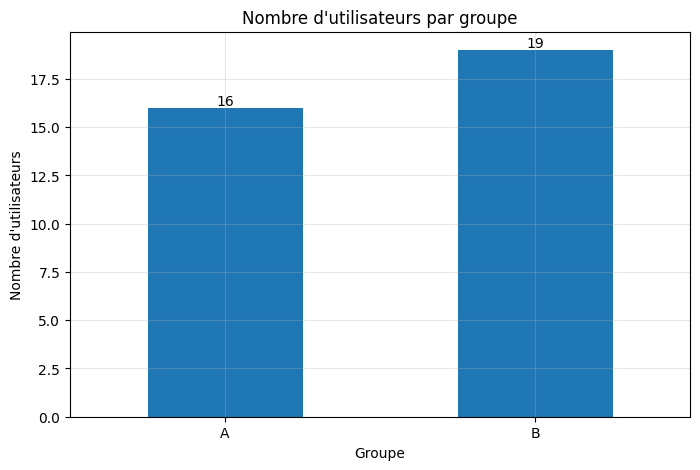

In [3]:
import matplotlib.pyplot as plt

users_by_groups = df_data.groupby('group')['Identifiant'].count()
plt.figure(figsize=(8, 5))
bars = users_by_groups.plot(kind='bar', stacked=True)
plt.title('Nombre d\'utilisateurs par groupe')
plt.xlabel('Groupe')
plt.ylabel('Nombre d\'utilisateurs')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# Add value labels above each bar
for i, v in enumerate(users_by_groups):
    plt.text(i, v, str(v), ha='center', va='bottom')

os.makedirs('../../generated/figures/forms', exist_ok=True)
plt.savefig('../../generated/figures/forms/users_by_groups.pdf', dpi=300, bbox_inches='tight')

plt.show()

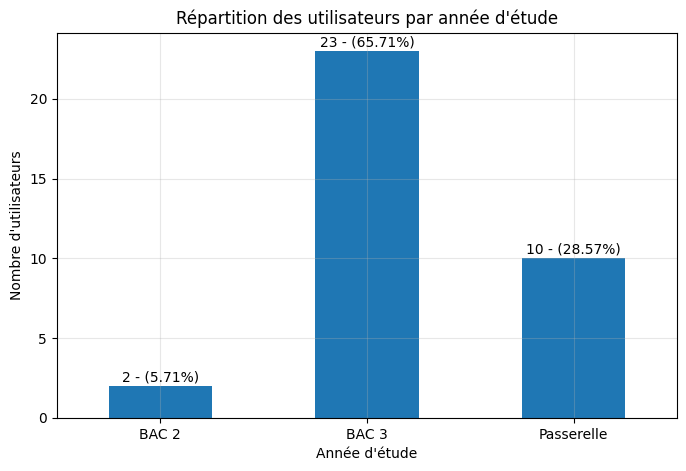

In [4]:
users_by_years = df_data.groupby('D-Année d\'étude')['Identifiant'].count()

plt.figure(figsize=(8, 5))
bars = users_by_years.plot(kind='bar', stacked=True)
plt.title('Répartition des utilisateurs par année d\'étude')
plt.xlabel('Année d\'étude')
plt.ylabel('Nombre d\'utilisateurs')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# Add value labels above each bar
for i, v in enumerate(users_by_years):
    plt.text(i, v + 0.1, f"{v} - ({round(v / users_by_years.sum() * 100, 2)}%)", ha='center', va='bottom')

os.makedirs('../../generated/figures/forms', exist_ok=True)
plt.savefig('../../generated/figures/forms/users_by_years.pdf', dpi=300, bbox_inches='tight')

plt.show()

# Outils gamifiés

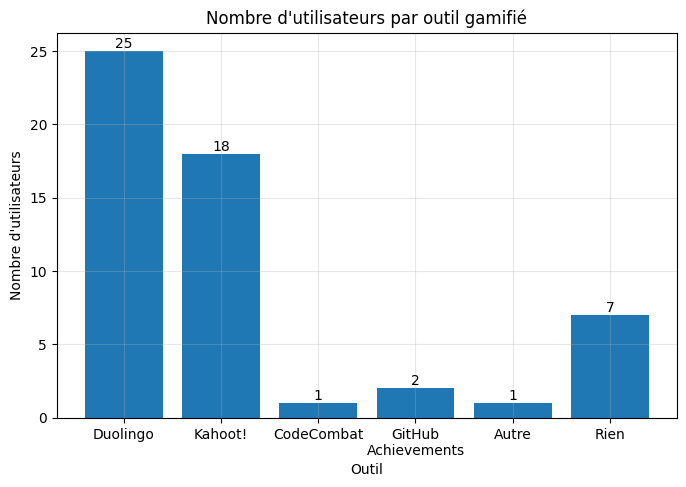

In [5]:
# Split les réponses et compte les occurrences
outils_reponses = df_data['D-Outils gamifiés déjà utilisés ?']

# Count null values and create list with "Rien" for nulls
outils_split = [['Rien'] if pd.isna(outils) else outils.split(',') for outils in outils_reponses]
outils_flat = [outil.strip() for sublist in outils_split for outil in sublist]
outils_count = Counter(outils_flat)

# Move "Rien" to end by recreating Counter with ordered items
items = [(k, v) for k, v in outils_count.items() if k != 'Rien']
if 'Rien' in outils_count:
    items.append(('Rien', outils_count['Rien']))
outils_count = Counter(dict(items))

# Affichage des résultats  
plt.figure(figsize=(8, 5))
plt.bar(outils_count.keys(), outils_count.values())
plt.title('Nombre d\'utilisateurs par outil gamifié')
plt.xlabel('Outil')
plt.ylabel('Nombre d\'utilisateurs')
plt.grid(True, alpha=0.3)

# Format x labels with newlines
labels = ['\n'.join(k.split()) for k in outils_count.keys()]
plt.xticks(range(len(labels)), labels)

# Ajouter les valeurs au-dessus des barres
for i, (k, v) in enumerate(outils_count.items()):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.savefig('../../generated/figures/forms/users_by_tools.pdf', dpi=300, bbox_inches='tight')
plt.show()


# Niveau initial

<Figure size 1000x500 with 0 Axes>

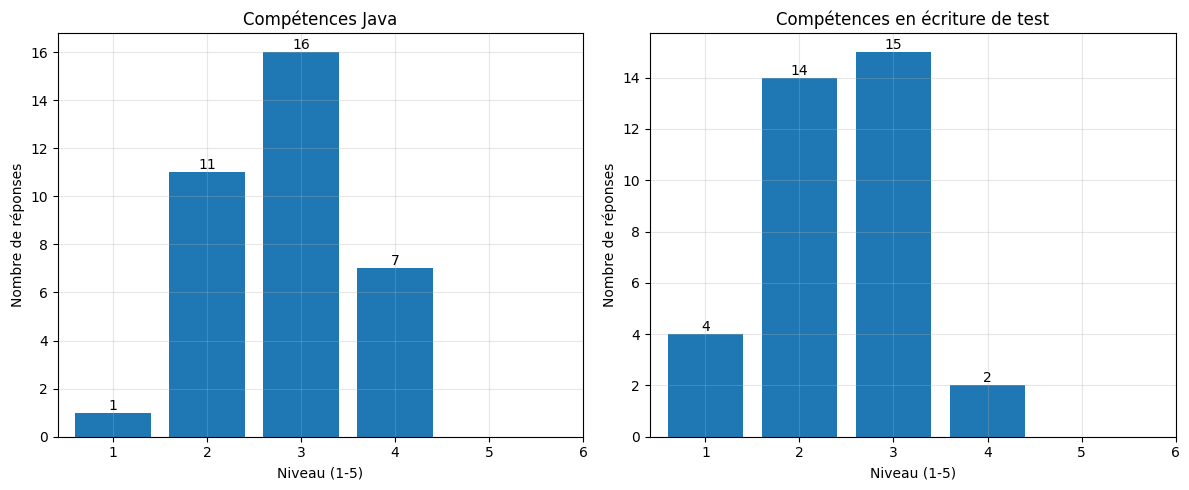

In [6]:
plt.figure(figsize=(10, 5))

# Get data for the two questions
java_comp = df_data['D-Compétences java']
test_comp = df_data['D-Compétences en écriture de test']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Java competencies
java_counts = java_comp.value_counts().sort_index()
ax1.bar(java_counts.index, java_counts.values)
ax1.set_title('Compétences Java')
ax1.set_xlabel('Niveau (1-5)')
ax1.set_ylabel('Nombre de réponses')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, 7))
for i, v in enumerate(java_counts.values):
    ax1.text(java_counts.index[i], v, str(v), ha='center', va='bottom')

# Plot Test competencies 
test_counts = test_comp.value_counts().sort_index()
ax2.bar(test_counts.index, test_counts.values)
ax2.set_title('Compétences en écriture de test')
ax2.set_xlabel('Niveau (1-5)')
ax2.set_ylabel('Nombre de réponses')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(1, 7))
for i, v in enumerate(test_counts.values):
    ax2.text(test_counts.index[i], v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('../../generated/figures/forms/initial_level.pdf', dpi=300, bbox_inches='tight')
plt.show()


# Likerts

In [7]:
if not os.path.exists(likert_questions_csv_path):
    raise FileNotFoundError(f"Le fichier {likert_questions_csv_path} n'existe pas. Exécutez le script '../../FormsAppsScripts.gs' dans google drive pour le générer.")

df_likert_questions = pd.read_csv(likert_questions_csv_path, sep=',').drop(columns=['Type'])
df_likert_questions["Titre"] = df_likert_questions["Formulaire"].str[0].str.upper() + "-" + df_likert_questions["Titre"]
df_likert_questions


,Formulaire,Titre,Label Gauche,Label Droit
0,demographic,D-Compétences java,Débutant·e,Expert·e
1,demographic,D-Compétences en écriture de test,Débutant·e,Expert·e
2,demographic,D-Motivation initiale à écrire des tests,Faible,Elevée
3,achievements,A-Facilité d'utilisation du mode achievements,Facile,Difficile
4,achievements,A-Avis sur l'utilisation des achievements,Ennuyeux,Amusant
5,achievements,A-Ressenti lors de l'utilisation des achieveme...,Accomplissement,Frustration
6,achievements,A-Ressenti après avoir utilisé les achievements,Fatigué·e,Stimulé·e
7,achievements,A-J'ai été distrait·e à cause des achievements...,Pas du tout,Tout à fait
8,achievements,A-Motivation à écrire des tests avec le systèm...,Faible,Elevée
9,achievements,A-Le système d'achievement m'incite à écrire p...,Pas du tout,Tout à fait


In [8]:
likert_by_label = {}
answers = df_data.transpose()

for index, row in df_likert_questions.iterrows():
    titre = row["Titre"].strip()  # Strip whitespace and newlines
    category = row["Label Gauche"] + "-" + row["Label Droit"]

    if category not in likert_by_label:
        likert_by_label[category] = {}

    if titre in answers.index:  # Check if titre exists in answers index
        likert_by_label[category][titre[2:]] = count_occurence(answers.loc[titre].values.tolist())


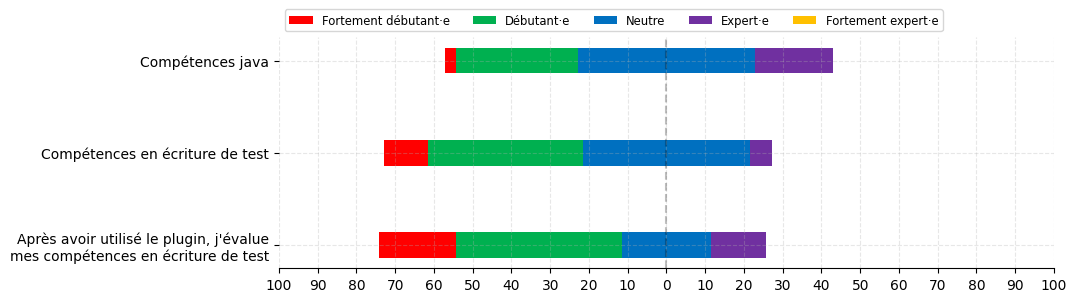

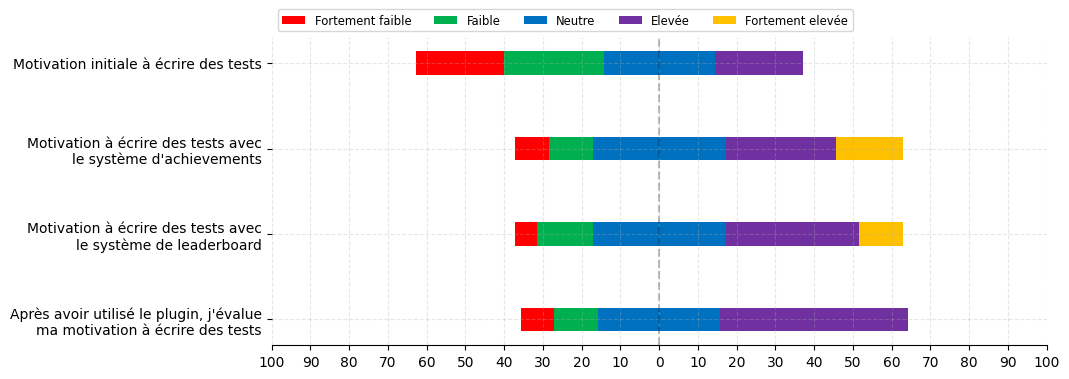

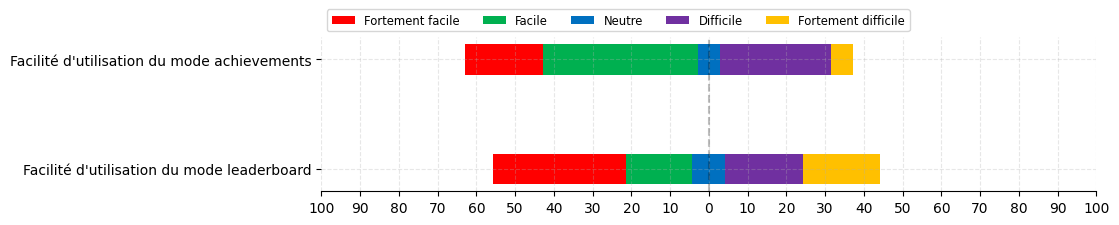

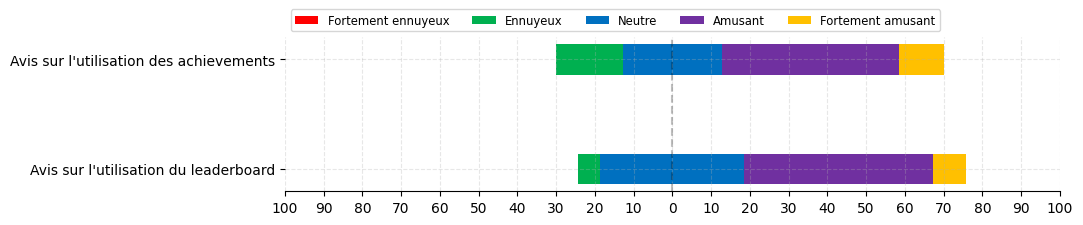

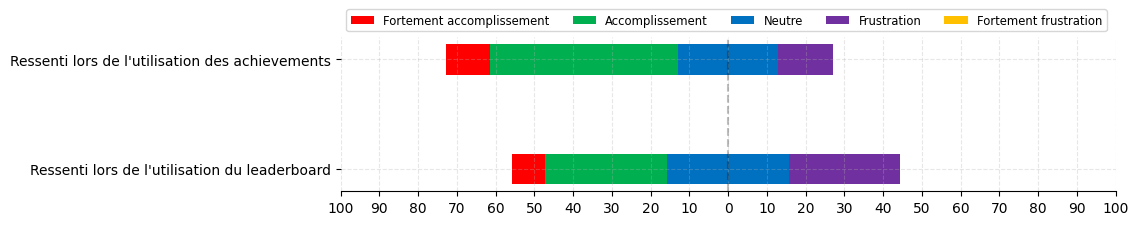

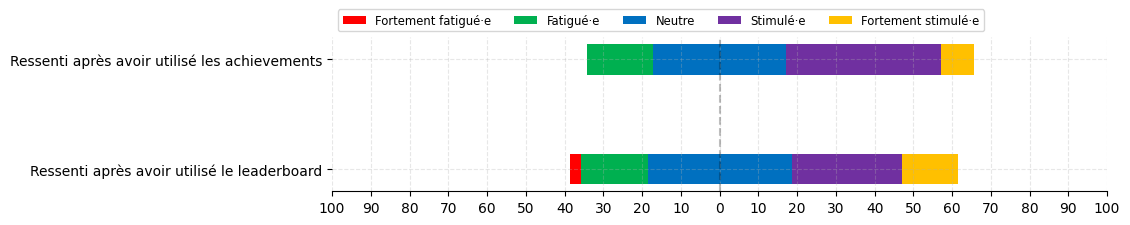

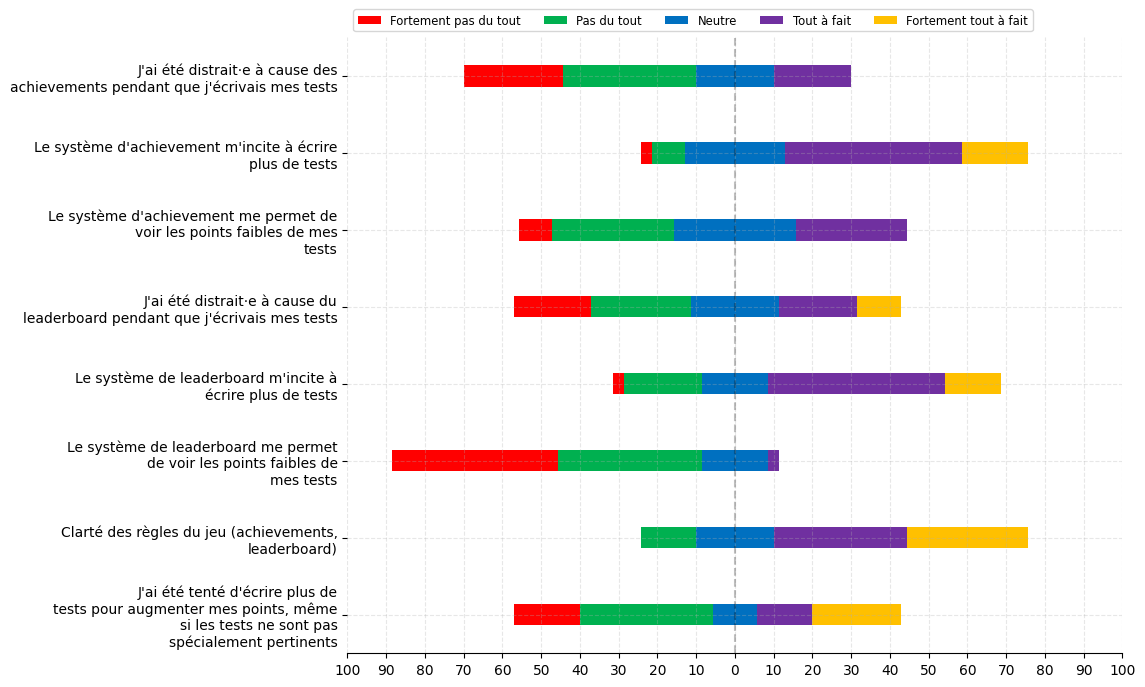

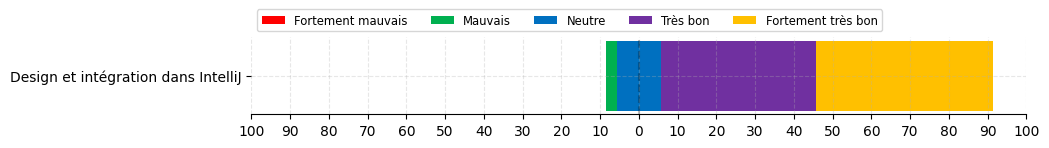

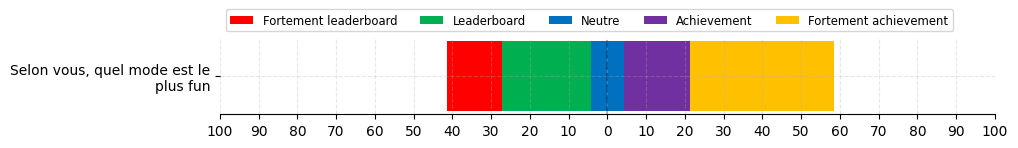

In [9]:
import matplotlib.pyplot as plt
import numpy as np

if not os.path.exists(likert_out_path):
    os.makedirs(likert_out_path)

# Generate 5 light pastel colors in a gradient
colors = ['#FF0000', '#00B050', '#0070C0', '#7030A0', '#FFC000']

for category, results in likert_by_label.items():
    left, right = category.split("-")

    category_names = ['Fortement ' + left.lower(), left, 'Neutre', right, 'Fortement ' + right.lower()]

    labels = ['\n'.join(
        [' '.join(label.strip('? \n').split()[i:i + 6]) for i in range(0, len(label.strip('? \n').split()), 6)]) for
              label in results.keys()]
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1] // 2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index] / 2

    num_items = len(labels)
    fig_height = num_items

    fig, ax = plt.subplots(figsize=(10, fig_height))

    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        height = 20 / 72  # Convert 20px to inches
        rects = ax.barh(labels, widths, left=starts, height=height, label=colname, color=color)

    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)

    # X Axis
    ax.set_xlim(-100, 100)
    ax.set_xticks(np.arange(-100, 101, 10))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.3)

    # Y Axis
    ax.invert_yaxis()

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ledgend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')

    # Set Background Color
    fig.set_facecolor('#FFFFFF')
    fig.savefig(f"{likert_out_path}/{left}_{right}.pdf", dpi=300, bbox_inches='tight')

plt.show()
